In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [10]:
PATH = "E:\\Repo Scripts\\Level Set Codes\\Image\\1.jpg"
img = cv2.imread(PATH,0).astype(np.float32)
# plt.imshow(img,cmap='gray')

# C-V

In [42]:
def Heaviside(phi:np.ndarray,epsilon:int=1)->np.ndarray:
    H = 0.5*(1+ (2/np.pi)*np.arctan(phi/epsilon))
    return H
def Dirac(phi:np.ndarray,epsilon:int=1)->np.ndarray:
    Delta_h=(epsilon/np.pi)/(epsilon**2+ phi**2)
    return Delta_h
def NeumannBoundCond(g):
    #Make a function satisfy Neumann boundary condition
    [nrow,ncol] = np.size(g)
    g[1, nrow][1, ncol] = g[3, nrow-2][3, ncol-2]
    # g[1, nrow],2:end-1) = g([3 nrow-2],2:end-1)
    # g(2:end-1,[1 ncol]) = g(2:end-1,[3 ncol-2])
    return g
def Calculate_c(Img:np.ndarray,H_phi:np.ndarray)->float:
    numer_1 = np.sum(H_phi*Img) 
    denom_1 = np.sum(H_phi)
    C1 = numer_1/denom_1

    numer_2 = np.sum((1-H_phi)*Img)
    denom_2 = np.sum(1-H_phi)
    C2 = numer_2/denom_2
    return C1,C2

In [12]:
epsilon = 1.
lambda1 = 1. #inside
lambda2 = 1. #outside
mu = 1.  #length
nu = 0.  #area
epoch = 10

In [43]:
def evolveLSF(I:np.ndarray,phi:np.ndarray,epoch:int,epsilon:float = 1,timestep:float = 0.1,lambda_1:float = 1., lambda_2: float = 1,nu:float = 1)->np.ndarray:
    for i in range(epoch):
        # phi = NeumannBoundCond(phi)
        dirac_phi = Dirac(phi)
        H_phi = Heaviside(phi, epsilon)
        # kappa = CURVATURE(phi,'cc')
        C1,C2 = Calculate_c(I,H_phi)
        # updating the phi function
        phi = phi+timestep*(dirac_phi*(nu-lambda_1*(I-C1)**2+lambda_2*(I-C2)**2))
    return phi


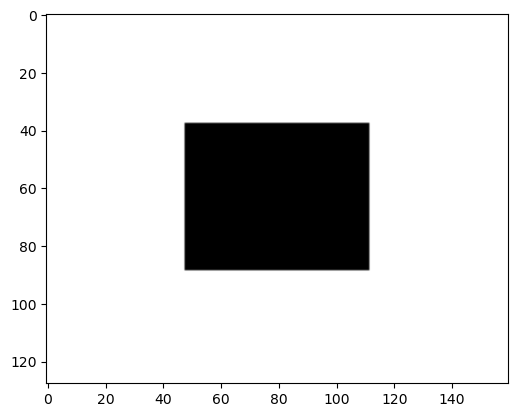

In [14]:
phi0 = np.ones((img.shape[0],img.shape[1]))
phi0[int(3*img.shape[0]/10):int(7*img.shape[0]/10),int(3*img.shape[1]/10):int(7*img.shape[1]/10)] = -1
plt.imshow(phi0,cmap='gray')

In [24]:
phi = evolveLSF(img,phi0,10)


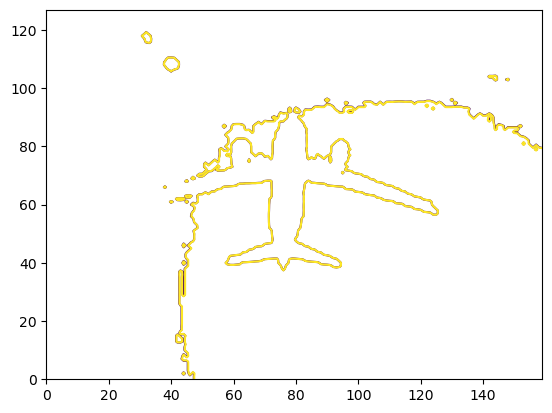

In [25]:
plt.contour(phi,[-0.5,0.5])

# RSF